In [71]:
import numpy as np
from scipy.stats import norm
import time
start_time = time.time()
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix #Classification report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [10]:
%matplotlib inline

In [11]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


PART A

In [12]:
#1a)Read the Data set “data_add_nik.csv” and print the shape of the dataset. [2 marks]

file_path = "/content/drive/MyDrive/AIMLCOURSE/UnSupervisedLearning/data_add_nik.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Print the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (3268, 8)


In [15]:
#1b)Check if there is any redundant column in the dataset and drop them. [1 mark]


# Check for redundant columns
constant_columns = [col for col in df.columns if df[col].nunique() == 1]

# Drop redundant columns
df = df.drop(columns=constant_columns, axis=1)

# Print the new shape of the dataset after dropping redundant columns
print("Shape of the dataset after dropping redundant columns:", df.shape)


Shape of the dataset after dropping redundant columns: (3268, 8)


In [16]:
#1c)Check if there are any duplicate records in the dataset. If yes, drop them. [1 mark]

# Check for duplicate records
duplicate_rows = df[df.duplicated()]

# Print the duplicate records, if any
if not duplicate_rows.empty:
    print("Duplicate records:")
    print(duplicate_rows)
    print()

    # Drop duplicate records
    df = df.drop_duplicates()

    # Print the new shape of the dataset after dropping duplicates
    print("Shape of the dataset after dropping duplicates:", df.shape)
else:
    print("No duplicate records found.")



Duplicate records:
                                       Product Name  Product ID  \
2792                              Nike Metcon 5 AMP  CD3395-006   
2861     Nike Mercurial Vapor 13 Club Neymar Jr. TF  AT8000-104   
2862    Nike Mercurial Vapor 13 Elite Neymar Jr. FG  AT7898-104   
2863  Nike Mercurial Vapor 13 Academy Neymar Jr. TF  AT7995-104   
2864  Nike Mercurial Vapor 13 Academy Neymar Jr. MG  AT7960-104   
...                                             ...         ...   
3258                      Nike ZoomX Vaporfly NEXT%  AO4568-600   
3259             Nike Mercurial Vapor 13 Academy IC  AT7993-414   
3261                        Kyrie 6 'Enlightenment'  BQ4630-500   
3264                     Nike Phantom Venom Club IC  AO0578-717   
3265           Nike Mercurial Superfly 7 Academy TF  AT7978-414   

      Listing Price  Sale Price  Discount Brand  Rating  Reviews  
2792              0       11995         0  Nike     5.0        2  
2861              0        5495         0 

In [18]:
#1d)Check the 5 points summary of the whole data and share your observations. [1 mark]

# Obtain the 5-number summary of the whole dataset
summary_statistics = df.describe()

# Print the 5-number summary statistics
print("Five-number summary statistics:")
print(summary_statistics)


"The insights that can be seen are : for the columns such as Listing price,Sale Price, Discount etc, we can now see the mean, median, mode, 25%ile, 75%ile etc."


Five-number summary statistics:
       Listing Price    Sale Price     Discount       Rating      Reviews
count    3180.000000   3180.000000  3180.000000  3180.000000  3180.000000
mean     6992.707547   6027.742767    27.619497     3.266635    41.529560
std      4677.133304   4192.481308    22.492385     1.393592    31.373989
min         0.000000    449.000000     0.000000     0.000000     0.000000
25%      4599.000000   2999.000000     0.000000     2.600000    12.000000
50%      5999.000000   4599.000000    40.000000     3.500000    39.000000
75%      8999.000000   7995.000000    50.000000     4.400000    69.000000
max     29999.000000  36500.000000    60.000000     5.000000   223.000000


'The insights that can be seen are : for the columns such as Listing price,Sale Price, Discount etc, we can now see the mean, median, mode, 25%ile, 75%ile etc.'

In [22]:
#2a)a. Check how many products have Listing_price ‘0’. Check it’s 5 points summary and share your insights.

# Assuming 'Listing_price' is the column containing the listing prices
zero_price_products = df[df['Listing Price'] == 0]

# Print the number of products with Listing_price '0'
print("Number of products with Listing_price '0':", len(zero_price_products))

# Check the 5-number summary for these products
summary_zero_price_products = zero_price_products.describe()

# Print the 5-number summary statistics for products with Listing_price '0'
print("Five-number summary statistics for products with Listing_price '0':")
print(summary_zero_price_products)


"Insight: Well, that is odd. We have around 362 columns with 0 listing price but a huge Sale price, ranging in the thousands. We might have to look into such values further."

Number of products with Listing_price '0': 362
Five-number summary statistics for products with Listing_price '0':
       Listing Price    Sale Price  Discount      Rating     Reviews
count          362.0    362.000000     362.0  362.000000  362.000000
mean             0.0  11204.682320       0.0    2.678177    7.803867
std              0.0   4538.187946       0.0    2.187662   19.140614
min              0.0   1595.000000       0.0    0.000000    0.000000
25%              0.0   7995.000000       0.0    0.000000    0.000000
50%              0.0  10995.000000       0.0    3.800000    1.000000
75%              0.0  13995.000000       0.0    4.700000    6.000000
max              0.0  36500.000000       0.0    5.000000  223.000000


'Insight: Well, that is odd. We have around 362 columns with 0 listing price but a huge Sale price, ranging in the thousands. We might have to look into such values further.'

In [25]:
#2b)Records having Listing_price ‘0’, replace them with Sale_Price of that record. [2 marks]

# Assuming 'Listing_price' and 'Sale_Price' are the columns containing the prices
# Replace '0' in 'Listing_price' with the corresponding 'Sale_Price'
df.loc[df['Listing Price'] == 0, 'Listing Price'] = df[df['Listing Price'] == 0]['Sale Price']

# Verify the changes
print("Number of products with Listing Price '0' after replacement:", len(df[df['Listing Price'] == 0]))


Number of products with Listing Price '0' after replacement: 0


In [26]:
#2c)Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach. [2 Marks]

# Check and print feature-wise percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Feature-wise percentage of missing values:")
print(missing_percentage)

#Imputing using the mean

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Verify if there are any remaining missing values
remaining_missing = df.isnull().sum().sum()
print("Number of remaining missing values after imputation:", remaining_missing)


Feature-wise percentage of missing values:
Product Name     0.0
Product ID       0.0
Listing Price    0.0
Sale Price       0.0
Discount         0.0
Brand            0.0
Rating           0.0
Reviews          0.0
dtype: float64
Number of remaining missing values after imputation: 0


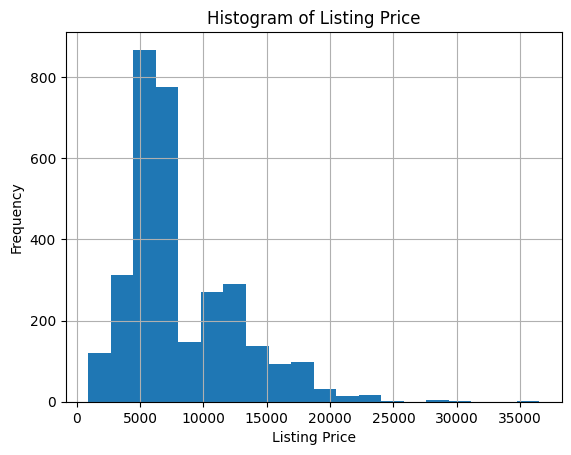

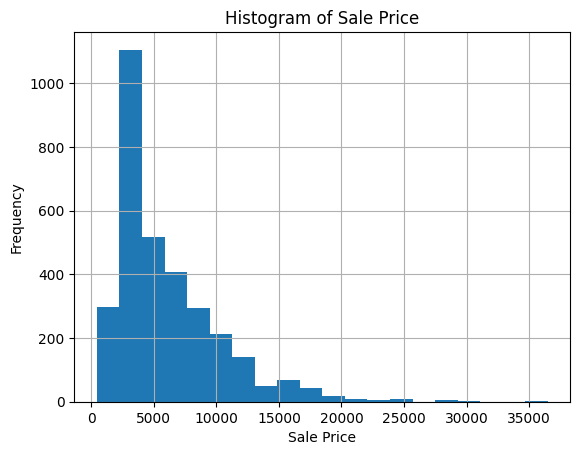

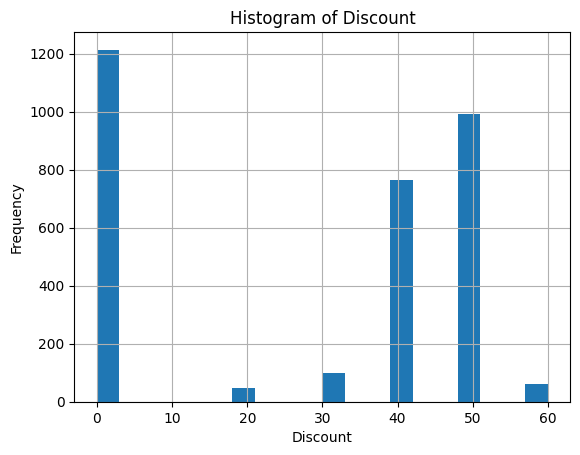

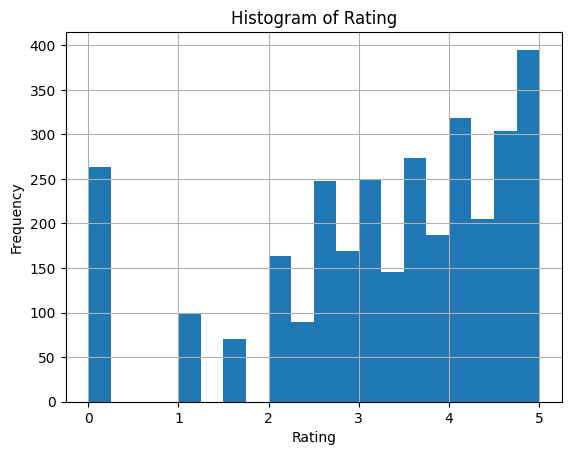

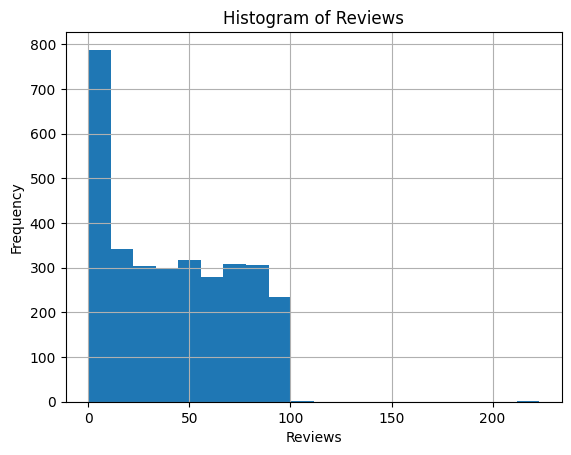

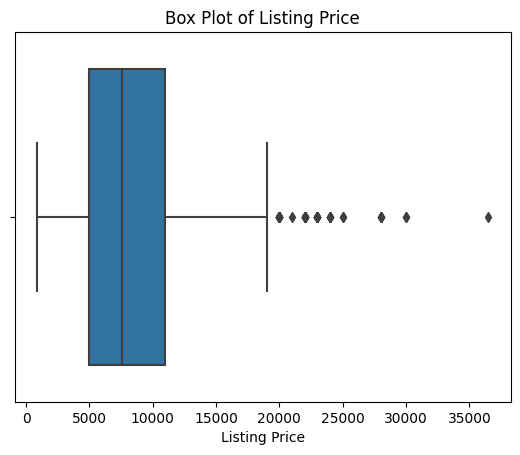

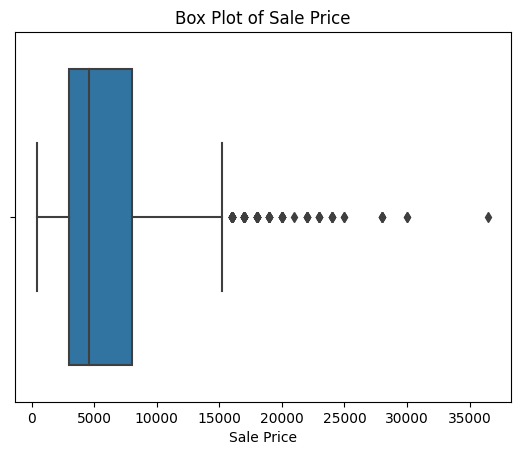

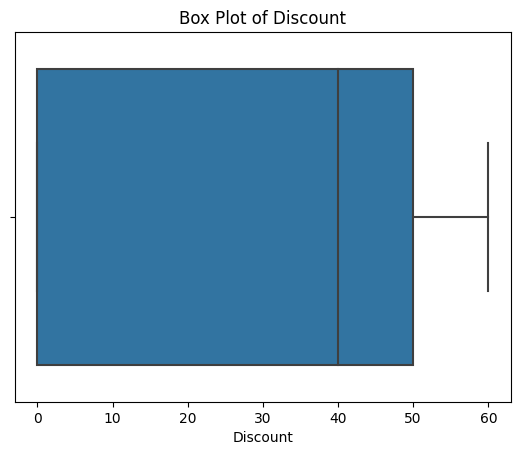

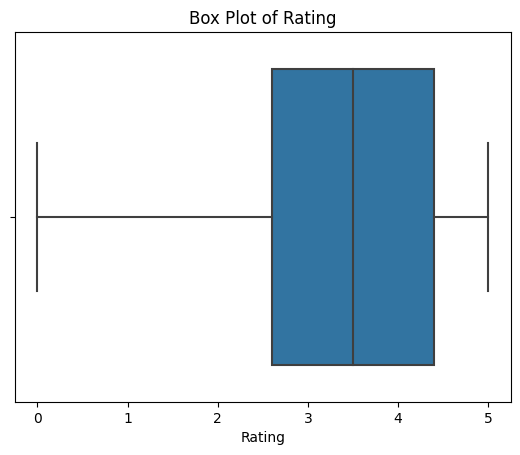

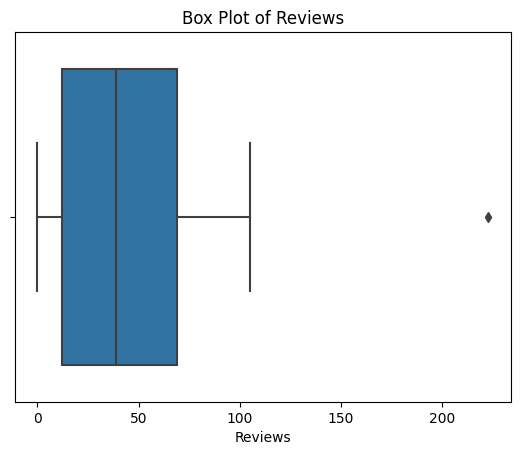

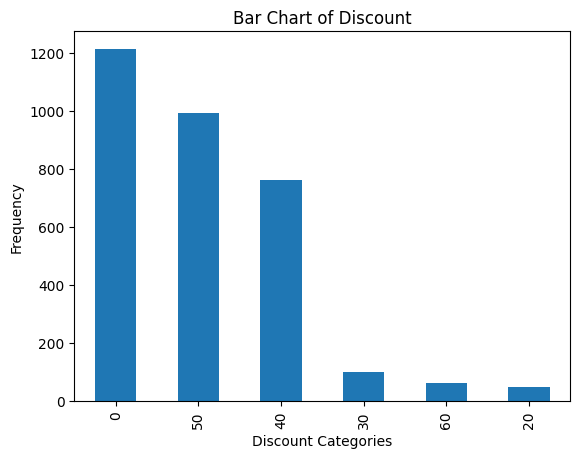

'So we have performed the uni variate analysis on the above mentioned columns and we can conclude that while there is a certain (peacefulness to the data), there are a couple of outliers that may have to be looked into further'

In [30]:
#2d)Perform univariate analysis on the data and share your insights. [ 2 marks ]

numerical_summary = df[['Listing Price', 'Sale Price', 'Discount', 'Rating', 'Reviews']].describe()

for col in ['Listing Price', 'Sale Price', 'Discount', 'Rating', 'Reviews']:
    df[col].hist(bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


for col in ['Listing Price', 'Sale Price', 'Discount', 'Rating', 'Reviews']:
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

#Examine the frequency distribution of the Discount category.(Cuz thats the most important thing right :) LOL
discount_frequency = df['Discount'].value_counts()


df['Discount'].value_counts().plot(kind='bar')
plt.title('Bar Chart of Discount')
plt.xlabel('Discount Categories')
plt.ylabel('Frequency')
plt.show()



"So we have performed the uni variate analysis on the above mentioned columns and we can conclude that while there is a certain (peacefulness to the data), there are a couple of outliers that may have to be looked into further"



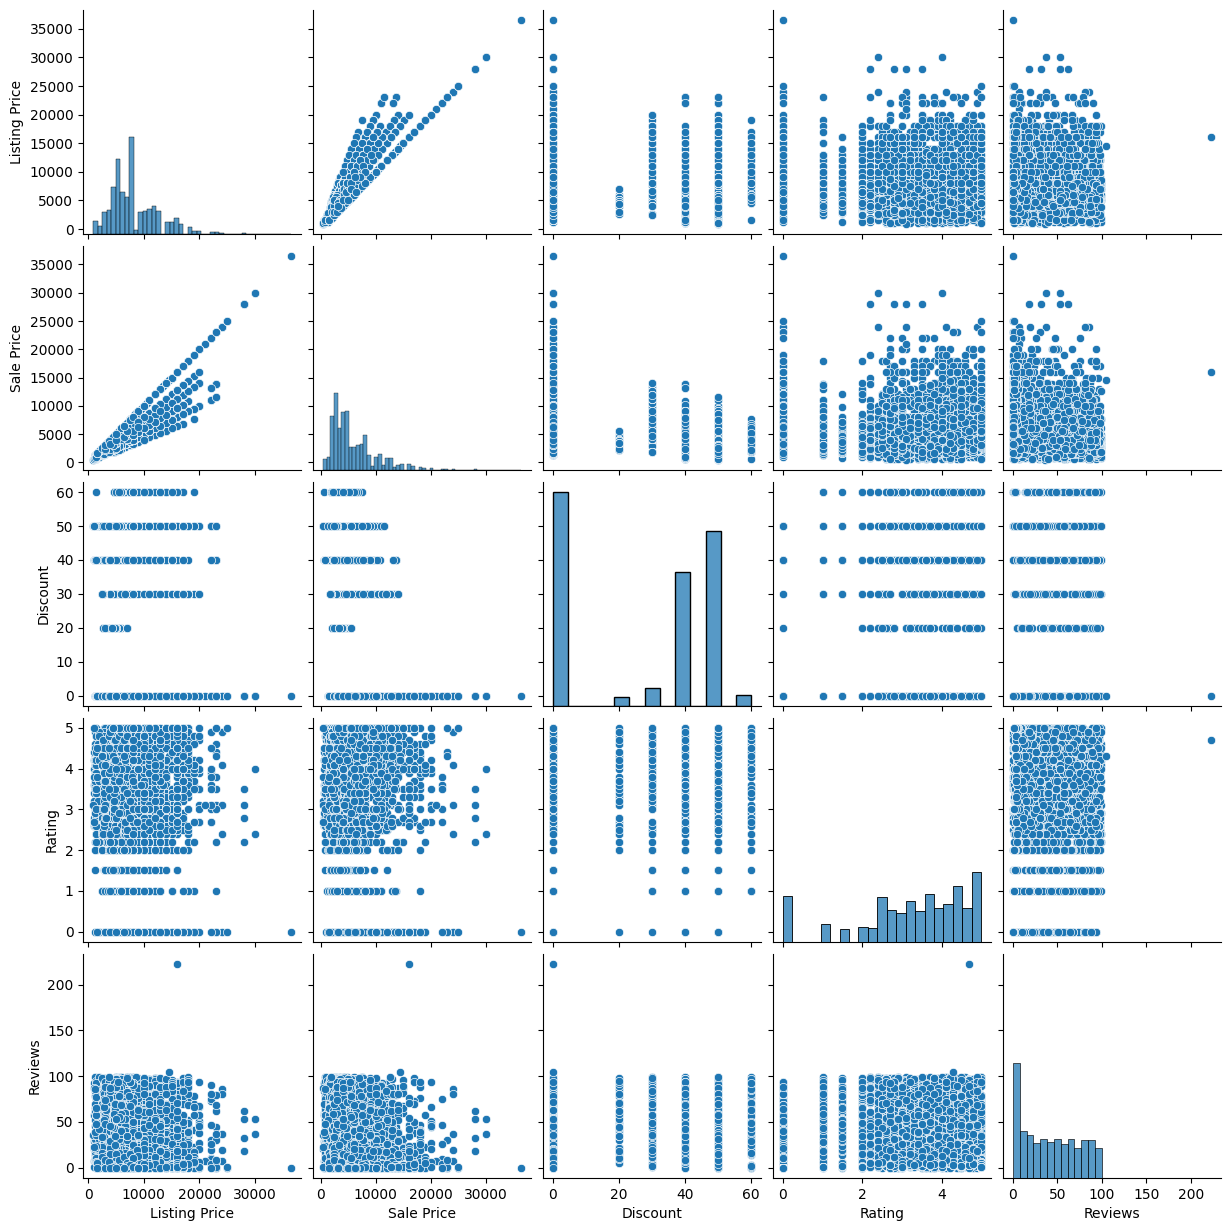

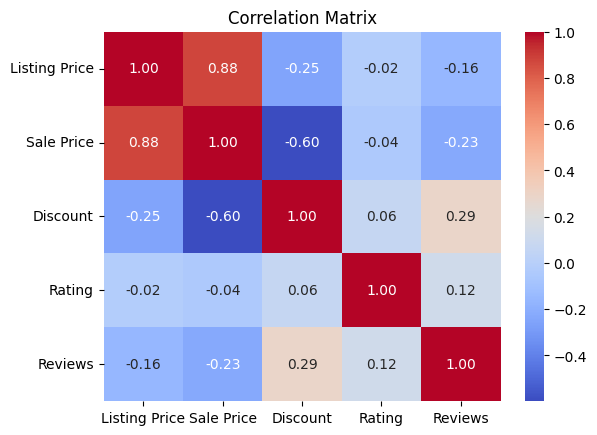

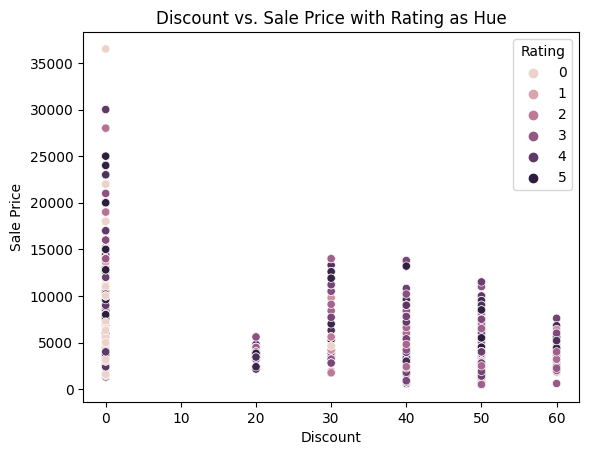

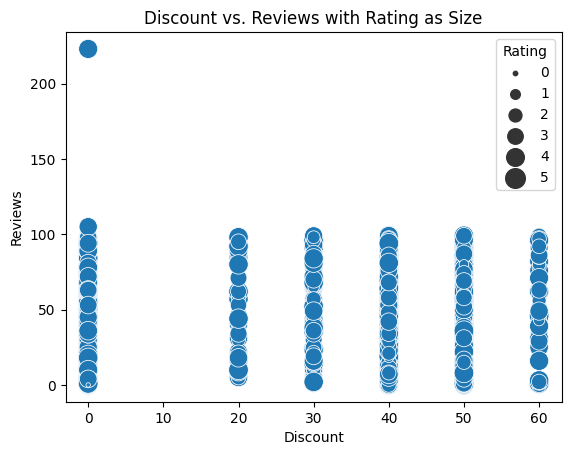

In [31]:
#2e)Perform bivariate and multivariate analysis and share your insights. [3 marks ]

#BIVARIATE ANALYSIS
sns.pairplot(df[['Listing Price', 'Sale Price', 'Discount', 'Rating', 'Reviews']])
plt.show()


correlation_matrix = df[['Listing Price', 'Sale Price', 'Discount', 'Rating', 'Reviews']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


#MULTIVARIATE ANALYSIS

sns.scatterplot(x='Discount', y='Sale Price', hue='Rating', data=df)
plt.title('Discount vs. Sale Price with Rating as Hue')
plt.show()


sns.scatterplot(x='Discount', y='Reviews', size='Rating', sizes=(10, 200), data=df)
plt.title('Discount vs. Reviews with Rating as Size')
plt.show()

In [34]:
#3a)Scale all the numeric variables using suitable technique. [2 marks]


# Extract numeric columns for scaling
numeric_columns = ['Listing Price', 'Sale Price', 'Discount', 'Rating', 'Reviews']

# Option 1: Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[numeric_columns] = min_max_scaler.fit_transform(df[numeric_columns])

# Option 2: Standard Scaling (Z-score normalization)
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[numeric_columns] = standard_scaler.fit_transform(df[numeric_columns])

# Print the first few rows of the scaled dataframes for inspection
print("Min-Max Scaled Data:")
print(df_minmax_scaled.head())

print("\nStandard Scaled Data:")
print(df_standard_scaled.head())


Min-Max Scaled Data:
                                        Product Name Product ID  \
0  Women's adidas Originals NMD_Racer Primeknit S...     AH2430   
1               Women's adidas Originals Sleek Shoes     G27341   
2                  Women's adidas Swim Puka Slippers     CM0081   
3   Women's adidas Sport Inspired Questar Ride Shoes     B44832   
4           Women's adidas Originals Taekwondo Shoes     D98205   

   Listing Price  Sale Price  Discount                    Brand  Rating  \
0       0.396056    0.195556  0.833333  Adidas Adidas ORIGINALS    0.96   
1       0.188197    0.092924  0.833333         Adidas ORIGINALS    0.66   
2       0.002809    0.004161  0.666667        Adidas CORE / NEO    0.52   
3       0.171344    0.084602  0.833333        Adidas CORE / NEO    0.82   
4       0.199433    0.098472  0.833333         Adidas ORIGINALS    0.70   

    Reviews  
0  0.183857  
1  0.107623  
2  0.165919  
3  0.156951  
4  0.322870  

Standard Scaled Data:
                  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

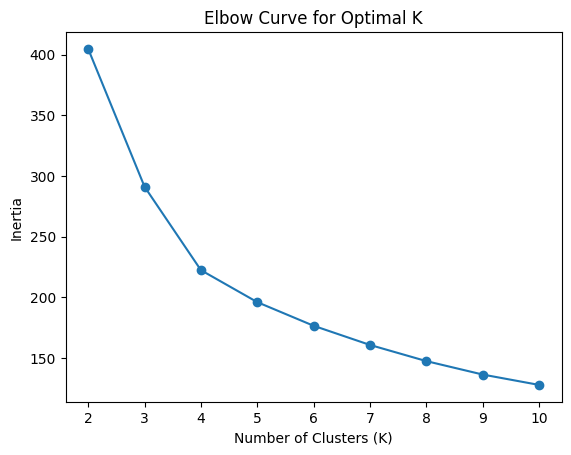

In [35]:
#4a)Apply K-Means clustering for 2 to 10 clusters.[3 Marks]

# Select the features for clustering
features_for_clustering = df_minmax_scaled[['Listing Price', 'Sale Price', 'Discount', 'Rating', 'Reviews']]

# Number of clusters to try (2 to 10)
k_values = range(2, 11)

# Create an empty list to store the inertia (sum of squared distances to the closest centroid) for each k
inertia_values = []

# Apply K-Means clustering for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_for_clustering)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve to determine the optimal number of clusters (k)
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Curve for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

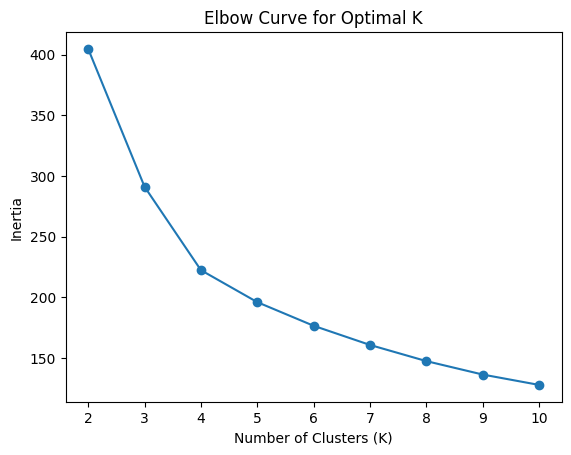

In [36]:
# 4b)Plot a visual and find elbow point. [2 Marks]

# Select the features for clustering
features_for_clustering = df_minmax_scaled[['Listing Price', 'Sale Price', 'Discount', 'Rating', 'Reviews']]

# Number of clusters to try (2 to 10)
k_values = range(2, 11)

# Create an empty list to store the inertia for each k
inertia_values = []

# Apply K-Means clustering for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_for_clustering)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Curve for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


In [41]:
#4c)Considering the above visual, mention which are the optimal clusters. [1 Mark]

"There is a clear elbow at k=3 or k=4. SO this could be the optimum number of clusters. Additionally, we could also consider k=7 as well, because the curve starts to flatten around this region."


'There is a clear elbow at k=3 or k=4. SO this could be the optimum number of clusters. Additionally, we could also consider k=7 as well, because the curve starts to flatten around this region.'

In [40]:
#4c)Calculate silhouette scores of all K clusters 2 to 10. [2 Marks]

# Select the features for clustering
features_for_clustering = df_minmax_scaled[['Listing Price', 'Sale Price', 'Discount', 'Rating', 'Reviews']]

# Number of clusters to try (2 to 10)
k_values = range(2, 11)

# Create an empty list to store silhouette scores for each k
silhouette_scores = []

# Calculate silhouette score for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features_for_clustering)
    silhouette_avg = silhouette_score(features_for_clustering, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Print the silhouette scores for each k
for k, score in zip(k_values, silhouette_scores):
    print(f"Silhouette Score for {k} clusters: {score}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for 2 clusters: 0.4995501180294308
Silhouette Score for 3 clusters: 0.5136476050673264
Silhouette Score for 4 clusters: 0.38700932744905814
Silhouette Score for 5 clusters: 0.3233442103048885
Silhouette Score for 6 clusters: 0.2932210740854473
Silhouette Score for 7 clusters: 0.2920937378207452
Silhouette Score for 8 clusters: 0.27573193134329227
Silhouette Score for 9 clusters: 0.27892997706619443
Silhouette Score for 10 clusters: 0.2802265869713653


In [42]:
#4e. Considering 4.c and 4.d, what is the optimal value of K? [1 Mark]

"""The silhouette score ranges from -1 to 1.
A higher silhouette score indicates better-defined clusters.
A score close to +1 suggests that data points are well matched to their own cluster and poorly matched to neighboring clusters.
A score close to 0 suggests overlapping clusters or that a data point is on the boundary between two clusters.
A score close to -1 suggests that a data point may have been assigned to the wrong cluster.


Hence, I would say that the best cluster is at k=3"""



'The silhouette score ranges from -1 to 1.\nA higher silhouette score indicates better-defined clusters.\nA score close to +1 suggests that data points are well matched to their own cluster and poorly matched to neighboring clusters.\nA score close to 0 suggests overlapping clusters or that a data point is on the boundary between two clusters.\nA score close to -1 suggests that a data point may have been assigned to the wrong cluster.\n\n\nHence, I would say that the best cluster is at k=3'

In [43]:
#4f)Train a K-means clustering model once again on the optimal number of clusters. [2 Marks]

# Select the features for clustering
features_for_clustering = df_minmax_scaled[['Listing Price', 'Sale Price', 'Discount', 'Rating', 'Reviews']]

# Optimal number of clusters (k)
optimal_k = 3

# Create and fit K-Means model with the optimal k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
df_minmax_scaled['Cluster_Label'] = kmeans_optimal.fit_predict(features_for_clustering)

# View the first few rows of the dataframe with cluster labels
print(df_minmax_scaled.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                        Product Name Product ID  \
0  Women's adidas Originals NMD_Racer Primeknit S...     AH2430   
1               Women's adidas Originals Sleek Shoes     G27341   
2                  Women's adidas Swim Puka Slippers     CM0081   
3   Women's adidas Sport Inspired Questar Ride Shoes     B44832   
4           Women's adidas Originals Taekwondo Shoes     D98205   

   Listing Price  Sale Price  Discount                    Brand  Rating  \
0       0.396056    0.195556  0.833333  Adidas Adidas ORIGINALS    0.96   
1       0.188197    0.092924  0.833333         Adidas ORIGINALS    0.66   
2       0.002809    0.004161  0.666667        Adidas CORE / NEO    0.52   
3       0.171344    0.084602  0.833333        Adidas CORE / NEO    0.82   
4       0.199433    0.098472  0.833333         Adidas ORIGINALS    0.70   

    Reviews  Cluster_Label  
0  0.183857              1  
1  0.107623              1  
2  0.165919              1  
3  0.156951              1  
4

In [45]:
#4g)Add K-means cluster labels to the original data. [3 Marks]

# Add K-means cluster labels to the original dataframe
df_with_clusters = df.copy()
df_with_clusters['Cluster_Label'] = df_minmax_scaled['Cluster_Label']

# View the first few rows of the dataframe with cluster labels
print(df_with_clusters.head())
print(df_with_clusters.tail())

                                        Product Name Product ID  \
0  Women's adidas Originals NMD_Racer Primeknit S...     AH2430   
1               Women's adidas Originals Sleek Shoes     G27341   
2                  Women's adidas Swim Puka Slippers     CM0081   
3   Women's adidas Sport Inspired Questar Ride Shoes     B44832   
4           Women's adidas Originals Taekwondo Shoes     D98205   

   Listing Price  Sale Price  Discount                    Brand  Rating  \
0          14999        7499        50  Adidas Adidas ORIGINALS     4.8   
1           7599        3799        50         Adidas ORIGINALS     3.3   
2            999         599        40        Adidas CORE / NEO     2.6   
3           6999        3499        50        Adidas CORE / NEO     4.1   
4           7999        3999        50         Adidas ORIGINALS     3.5   

   Reviews  Cluster_Label  
0       41              1  
1       24              1  
2       37              1  
3       35              1  
4     

<ipython-input-49-013eec8ec15b>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profiles = df_with_clusters.groupby('Cluster_Label').median()


Cluster Profiles:
               Listing Price  Sale Price  Discount  Rating  Reviews
Cluster_Label                                                      
0                     7999.0      7999.0       0.0     4.1     26.0
1                     6599.0      3599.0      50.0     3.5     50.0
2                     8995.0      7995.0       0.0     0.0      0.0


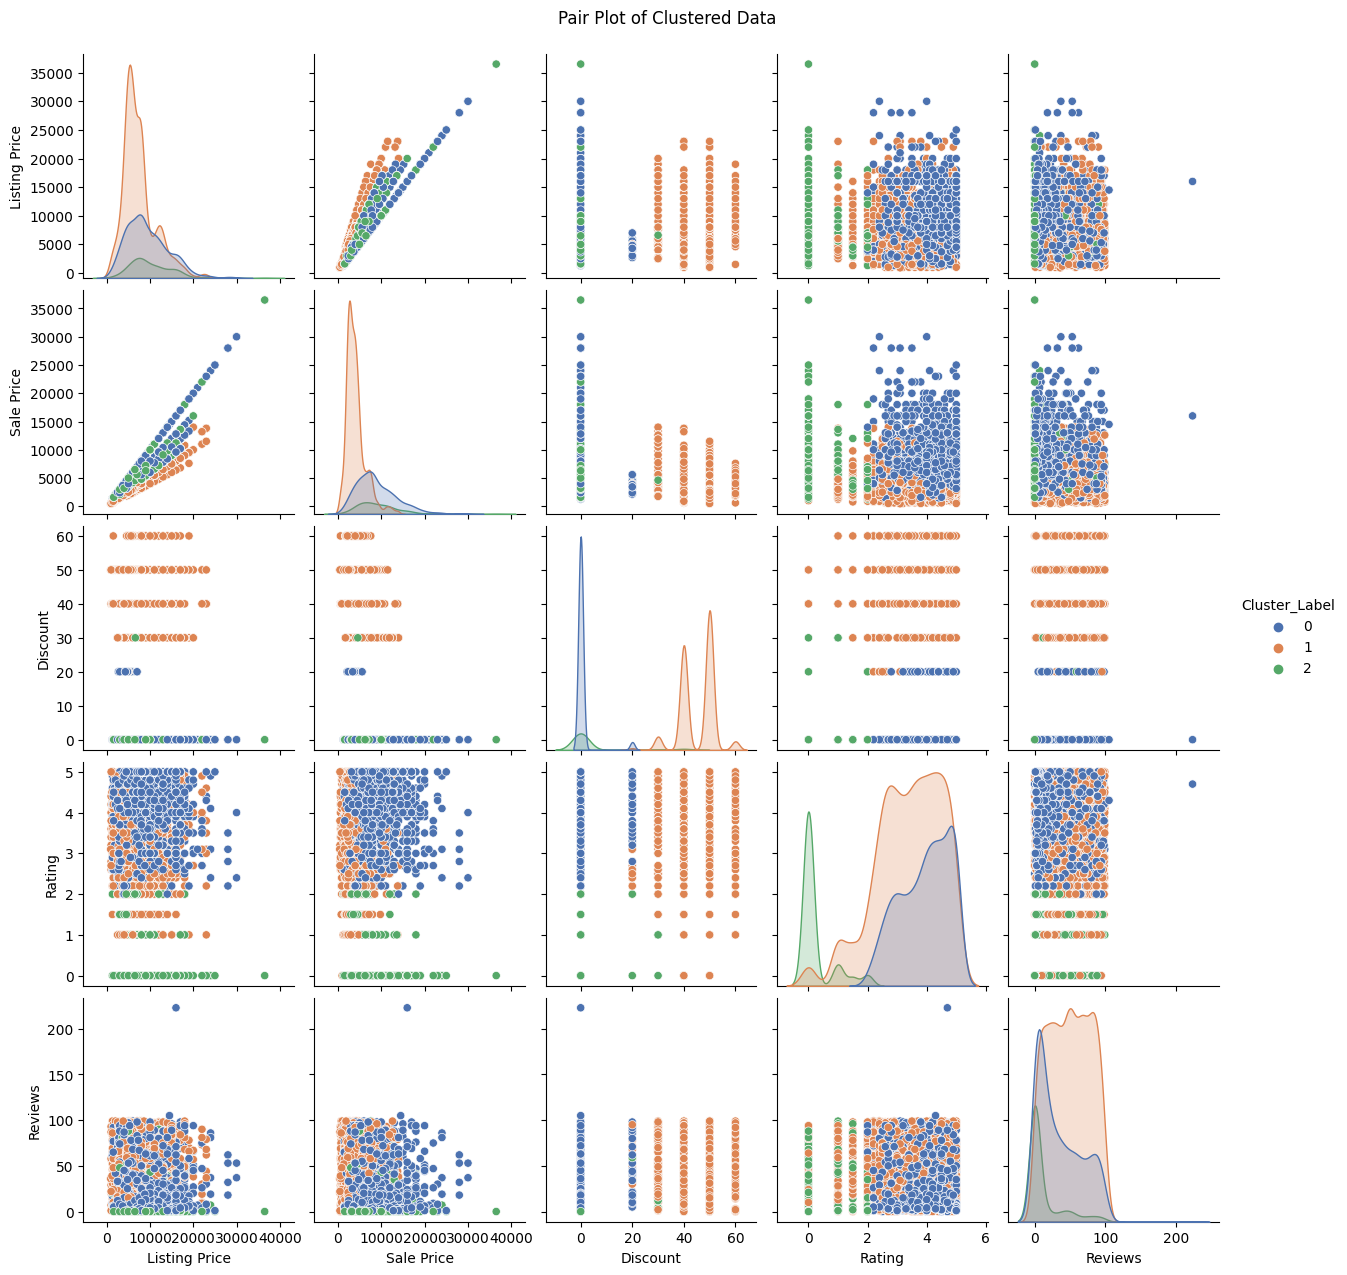

In [49]:
#4h) Do cluster profiling and display. [3 Marks]


# Group the data by the Cluster_Label and calculate the mean or median of each feature
cluster_profiles = df_with_clusters.groupby('Cluster_Label').median()

# Display the cluster profiles
print("Cluster Profiles:")
print(cluster_profiles)


# Pair plot of all features
sns.pairplot(df_with_clusters, hue='Cluster_Label', palette='deep')
plt.suptitle('Pair Plot of Clustered Data', y=1.02)
plt.show()



In [51]:
#4i)Share your insights on the clusters which are built. Here try to explain what each cluster is saying.

"""There is a direct correlation bw the sale price and the listing price as we can see a significant overlap between the clusters.

Most of the discounts Vs Reviews fall under cluster 1(Especially after discount % > say 30%). A lot of other insights can be drawn as well.

The customers are somewhat positve towards the company on the whole, as we can see most of the ratings and reviews fall under the cluster 0."""



'There is a direct correlation bw the sale price and the listing price as we can see a significant overlap between the clusters.\n\nMost of the discounts Vs Reviews fall under cluster 1(Especially after discount % > say 30%). A lot of other insights can be drawn as well.\n\nThe customers are somewhat positve towards the company on the whole, as we can see most of the ratings and reviews fall under the cluster 0.'

In [54]:
#4j)Considering the cluster profiles, give any 2-business recommendation which will help the business.[2 Marks]

"""Hpwever, a significant portion of the customers are still kind of dissatisfied with some of the companys products, especially at the higher price range. The company must fix this loophole.


Also the company can make more profits, if it reduced the discounts it gave. And it seems that, the higher end products and services are not exactly being the cash cow for the company. They are receiving mixed responses from customers"""

'Hpwever, a significant portion of the customers are still kind of dissatisfied with some of the companys products, especially at the higher price range. The company must fix this loophole.\n\n\nAlso the company can make more profits, if it reduced the discounts it gave. And it seems that, the higher end products and services are not exactly being the cash cow for the company. They are receiving mixed responses from customers'

PART B

In [58]:
#1a)Read the Data set “country_stats.csv” and print the shape of the dataset. [1 Mark]

file_path = "/content/drive/MyDrive/AIMLCOURSE/UnSupervisedLearning/country_stats.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)
print(df.head())

# Print the shape of the dataset
print("Shape of the dataset:", df.shape)

          country          Region  Surface area  Population in thousands  \
0     Afghanistan    SouthernAsia      652864.0                    35530   
1         Albania  SouthernEurope       28748.0                     2930   
2         Algeria  NorthernAfrica     2381741.0                    41318   
3  American Samoa       Polynesia         199.0                       56   
4         Andorra  SouthernEurope         468.0                       77   

   Population density  GDP: Gross domestic product  Economy: Agriculture  \
0                54.4                      20270.0                  23.3   
1               106.9                      11541.0                  22.4   
2                17.3                     164779.0                  12.2   
3               278.2                          NaN                   NaN   
4               163.8                       2812.0                   0.5   

   Economy: Industry  Economy: Services and other activity  \
0               23.3    

In [61]:
#1b)Print 5 points summary statistics of the data and share your observations.

# Display the 5-number summary statistics
summary_statistics = df.describe()

# Print the summary statistics
print("5-Number Summary Statistics:")
print(summary_statistics)


"INSIGHTS:We can now see the mean median, 25%ile, 75%ile of various variables such as Surface area, population of a countrya nd so on."

5-Number Summary Statistics:
       Surface area  Population in thousands  Population density  \
count  2.260000e+02             2.290000e+02          229.000000   
mean   5.932100e+05             3.275679e+04          462.824891   
std    1.796021e+06             1.332751e+05         2305.384253   
min    1.000000e-05             1.000000e+00            0.100000   
25%    4.306500e+03             4.310000e+02           35.900000   
50%    8.373550e+04             5.448000e+03           88.100000   
75%    4.376935e+05             1.919300e+04          222.800000   
max    1.709825e+07             1.409517e+06        25969.800000   

       GDP: Gross domestic product  Economy: Agriculture  Economy: Industry  \
count                 2.080000e+02            206.000000         208.000000   
mean                  3.538963e+05             11.481553          27.565385   
std                   1.548160e+06             12.100601          13.124423   
min                   3.300000e+01        

'INSIGHTS:We can now see the mean median, 25%ile, 75%ile of various variables such as Surface area, population of a countrya nd so on.'

In [65]:
#2)a. Perform Univariate Analysis on the data and find out which country has more population as per 2017. [1 Mark]


plt.figure(figsize=(100,100))
sns.barplot(x='Population in thousands', y='country', data=df.sort_values(by='Population in thousands', ascending=False))
plt.title('Population of Countries in 2017')
plt.xlabel('Population (in thousands)')
plt.ylabel('Country')
plt.show()


"""Clearly, China and India are the 2 most populous countries in the world, as illustarted by this graph"""

'Clearly, China and India are the 2 most populous countries in the world, as illustarted by this graph'

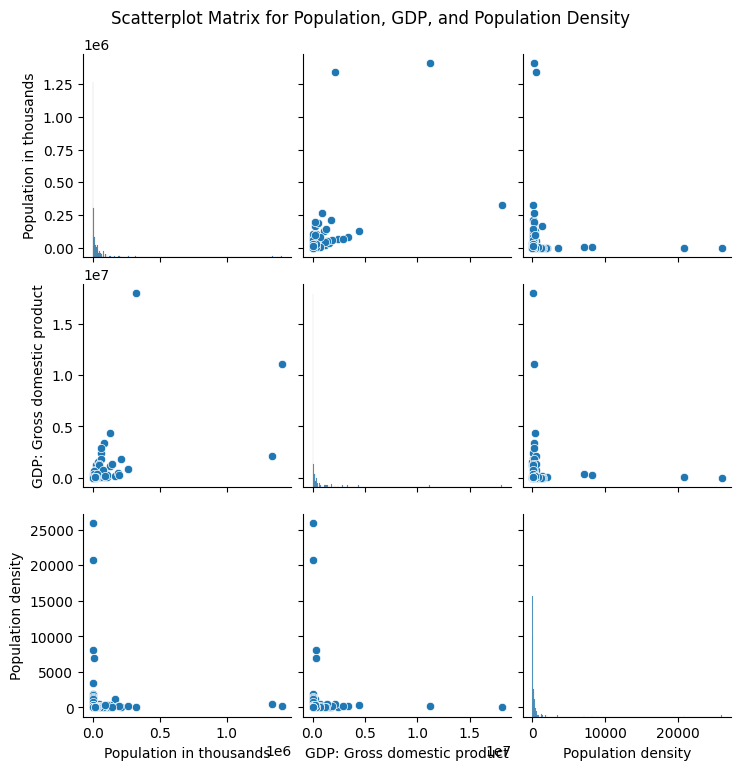

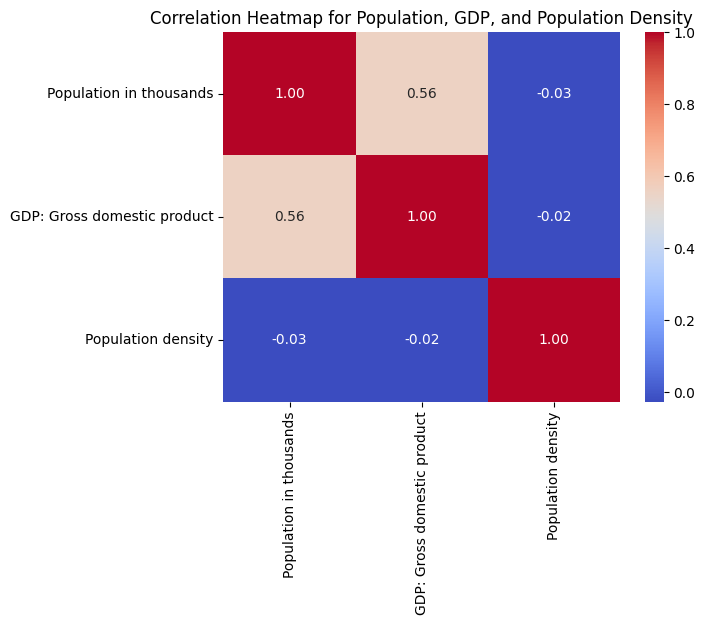

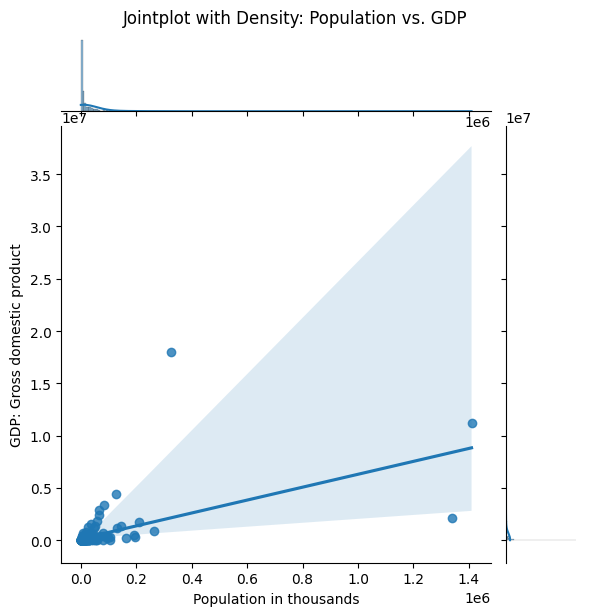

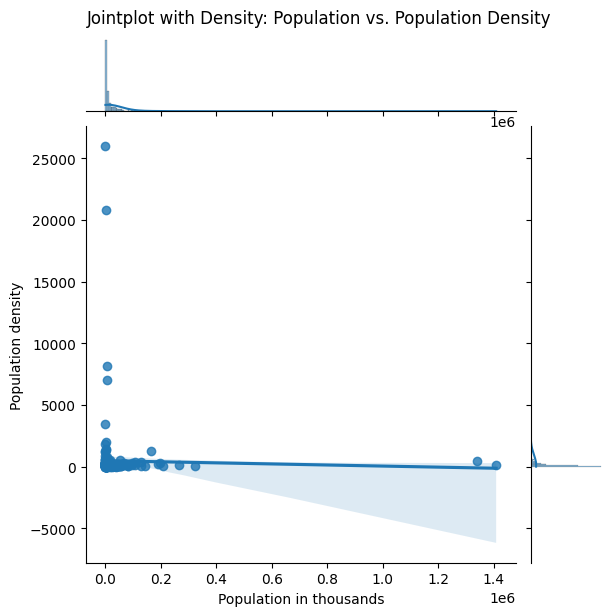

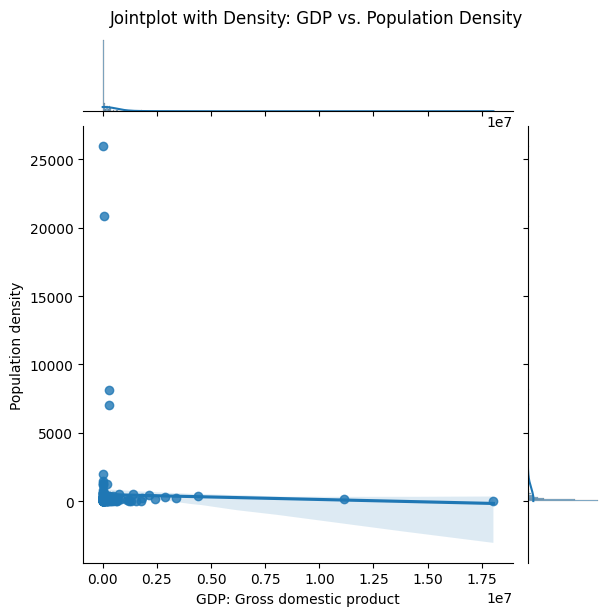

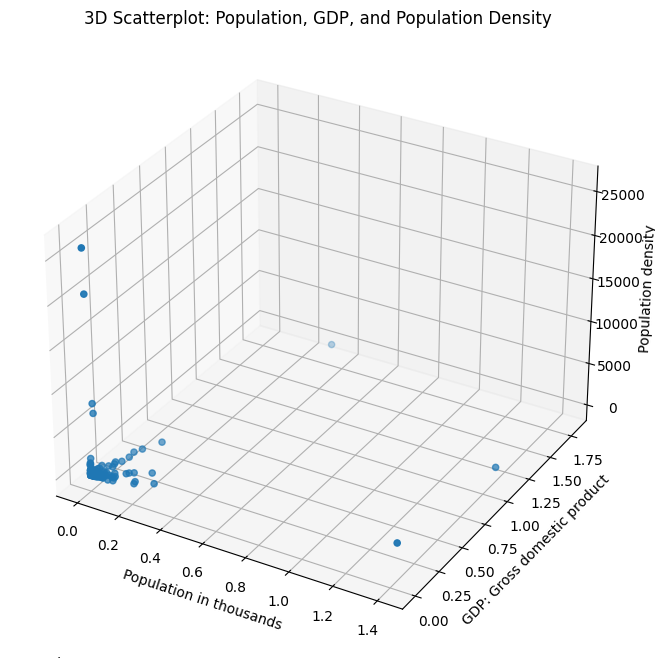

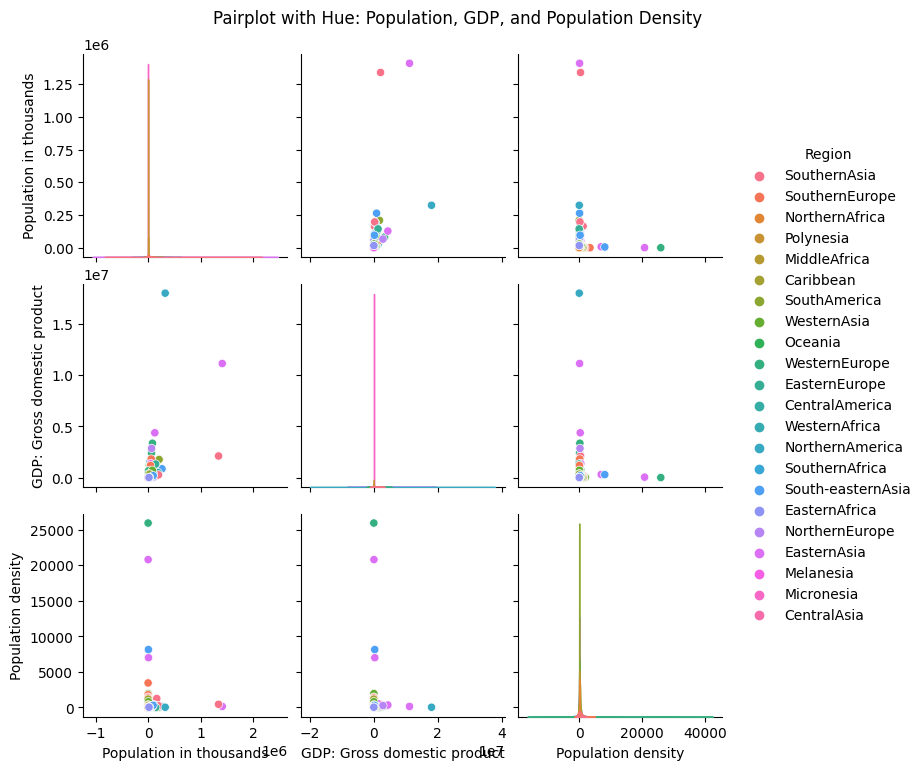

In [67]:
#2b)Perform bivariate and multivariate analysis and share your insights. Any 2 plots which explains the relationship better. [2 Marks]

selected_columns = ['Population in thousands', 'GDP: Gross domestic product', 'Population density']

# Creating a pair plot
sns.pairplot(df[selected_columns])
plt.suptitle('Scatterplot Matrix for Population, GDP, and Population Density', y=1.02)
plt.show()


# Calculate the correlation matrix
correlation_matrix = df[selected_columns].corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Population, GDP, and Population Density')
plt.show()



# Jointplot for Population vs. GDP
sns.jointplot(x='Population in thousands', y='GDP: Gross domestic product', data=df, kind='reg')
plt.suptitle('Jointplot with Density: Population vs. GDP', y=1.02)
plt.show()

# Jointplot for Population vs. Population Density
sns.jointplot(x='Population in thousands', y='Population density', data=df, kind='reg')
plt.suptitle('Jointplot with Density: Population vs. Population Density', y=1.02)
plt.show()

# Jointplot for GDP vs. Population Density
sns.jointplot(x='GDP: Gross domestic product', y='Population density', data=df, kind='reg')
plt.suptitle('Jointplot with Density: GDP vs. Population Density', y=1.02)
plt.show()


# 3D Scatterplot for Population, GDP, and Population Density
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Population in thousands'], df['GDP: Gross domestic product'], df['Population density'])
ax.set_xlabel('Population in thousands')
ax.set_ylabel('GDP: Gross domestic product')
ax.set_zlabel('Population density')
plt.title('3D Scatterplot: Population, GDP, and Population Density')
plt.show()


# Pairplot with hue for Region
sns.pairplot(df, vars=['Population in thousands', 'GDP: Gross domestic product', 'Population density'], hue='Region')
plt.suptitle('Pairplot with Hue: Population, GDP, and Population Density', y=1.02)
plt.show()



In [68]:
# 3a)Check if the data has any missing values, if any, impute those with suitable approach [1 Mark]

# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Print the columns with missing values (if any) and the corresponding count
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

df.fillna(df.median(), inplace=True)



Columns with Missing Values:
Surface area                             3
GDP: Gross domestic product             21
Economy: Agriculture                    23
Economy: Industry                       21
Economy: Services and other activity    21
International trade: Balance            19
Health: Total expenditure               39
Education: Government expenditure       81
Mobile-cellular subscriptions           20
Individuals using the Internet           1
dtype: int64


<ipython-input-68-56d3e99e8023>:10: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


In [69]:
#3b)Scale all the numeric variables in the data.

# Selecting only numeric columns for scaling
numeric_columns = df.select_dtypes(include='number').columns

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[numeric_columns] = minmax_scaler.fit_transform(df[numeric_columns])

# Standard Scaling (Z-score normalization)
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[numeric_columns] = standard_scaler.fit_transform(df[numeric_columns])

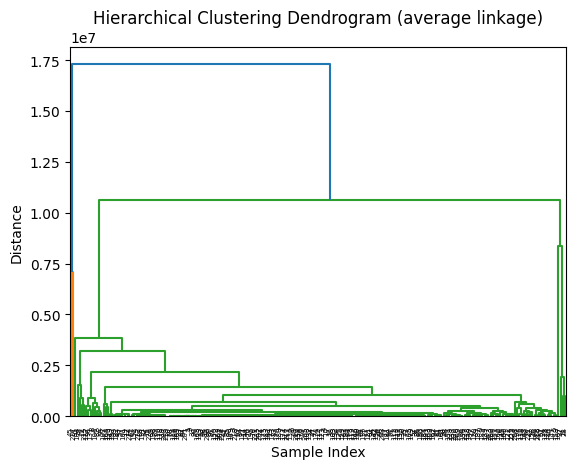

In [74]:
#4a)Apply Hierarchical clustering to the scaled data.

# One-hot encode categorical columns ('Country' and 'Region')
df_encoded = pd.get_dummies(df, columns=['country', 'Region'])

# Select columns for clustering
columns_for_clustering = df_encoded.columns

# Function to plot dendrogram
def plot_dendrogram(data, method='average'):
    linkage_matrix = sch.linkage(data, method=method)
    dendrogram = sch.dendrogram(linkage_matrix)
    plt.title(f'Hierarchical Clustering Dendrogram ({method} linkage)')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

# Apply hierarchical clustering to the encoded data
plot_dendrogram(df_encoded[columns_for_clustering])

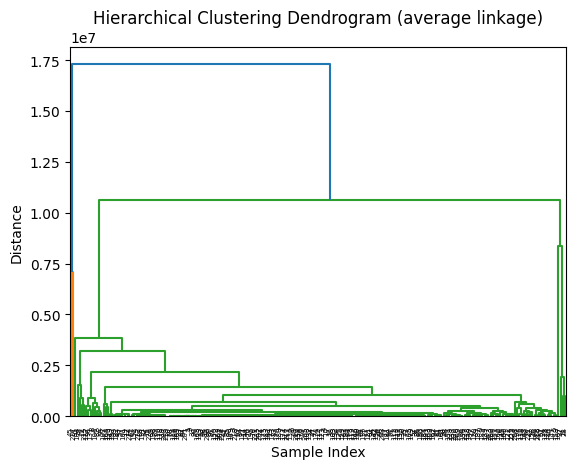

Optimal Number of Clusters: 229
Clusters: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 

In [76]:
#4b)Identify the number of optimum clusters using Dendrogram and briefly describe them [2 Marks]


# One-hot encode categorical columns ('Country' and 'Region')
df_encoded = pd.get_dummies(df, columns=['country', 'Region'])

# Select columns for clustering
columns_for_clustering = df_encoded.columns

# Function to plot dendrogram and determine the optimal number of clusters
def plot_dendrogram(data, method='average'):
    linkage_matrix = sch.linkage(data, method=method)
    dendrogram = sch.dendrogram(linkage_matrix)
    plt.title(f'Hierarchical Clustering Dendrogram ({method} linkage)')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

    # Determine the optimal number of clusters (look for the "elbow" in the dendrogram)
    optimal_clusters = sch.fcluster(linkage_matrix, t=0.8, criterion='distance')
    unique_clusters = set(optimal_clusters)

    print(f"Optimal Number of Clusters: {len(unique_clusters)}")
    print("Clusters:", unique_clusters)

# Apply hierarchical clustering to the encoded data
plot_dendrogram(df_encoded[columns_for_clustering])

<ipython-input-77-a5015962d6e5>:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profiles = df_clustered.groupby('Cluster_Label').mean()


Cluster Profiles:
               Surface area  Population in thousands  Population density  \
Cluster_Label                                                              
1                 9600000.0                1409517.0               150.1   
2                 9833517.0                 324460.0                35.5   
3                  551500.0                  64980.0               118.7   
4                  242495.0                  66182.0               273.6   
5                  357376.0                  82114.0               235.6   
...                     ...                      ...                 ...   
225               3287263.0                1339180.0               450.4   
226               7692060.0                  24451.0                 3.2   
227               8515767.0                 209288.0                25.0   
228               9984670.0                  36624.0                 4.0   
229              17098246.0                 143990.0                 8

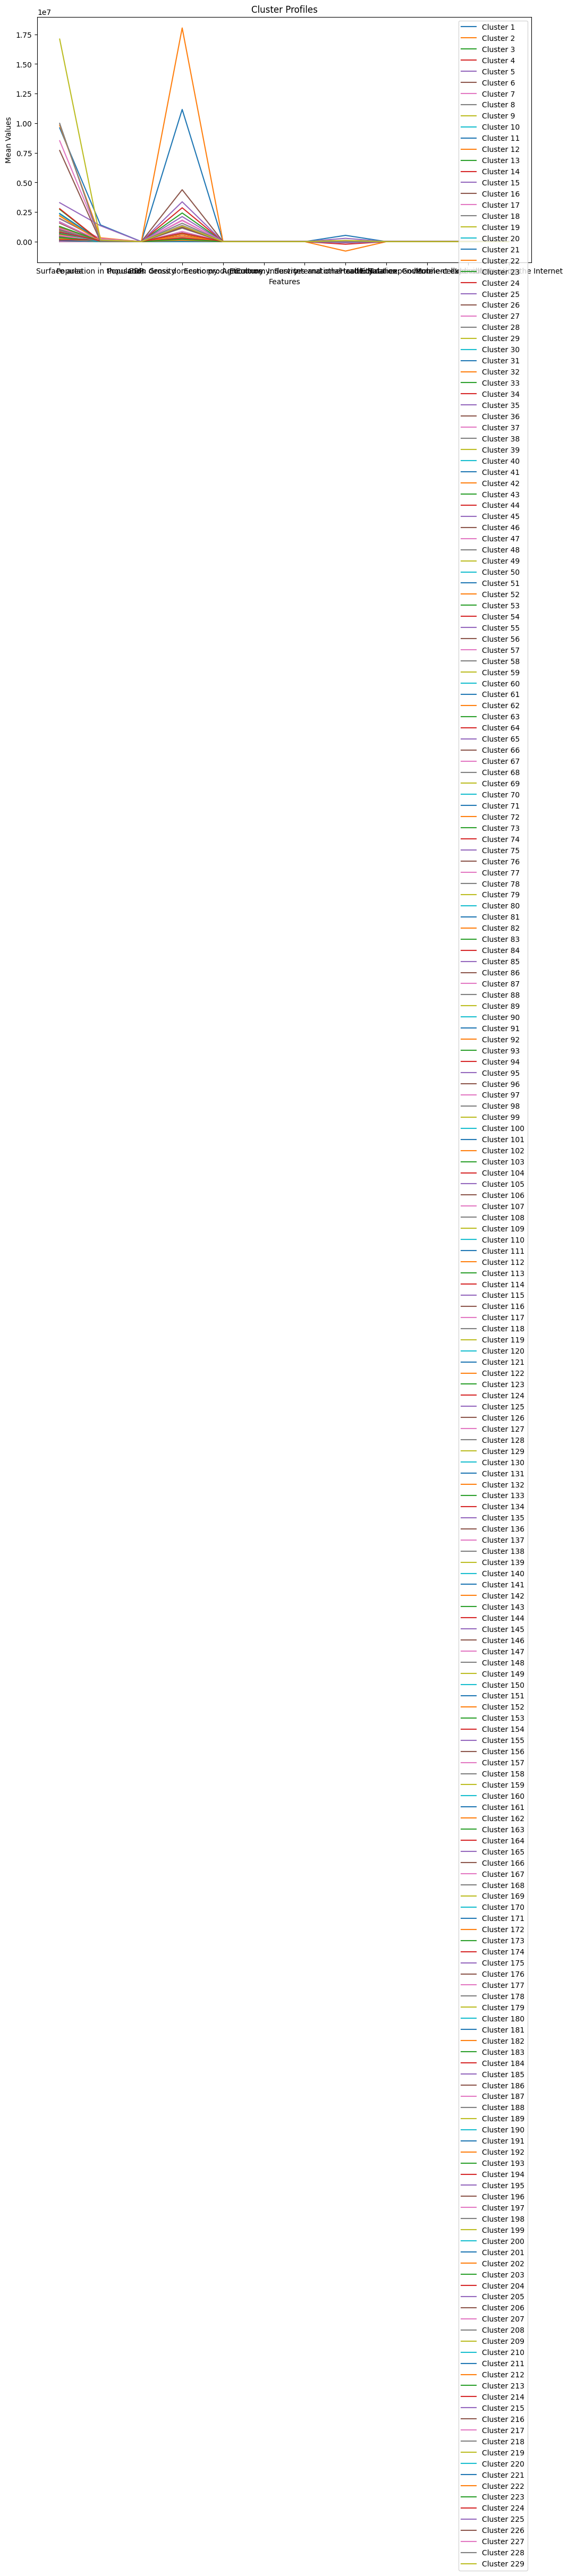

In [77]:
#4c)Do Cluster profiling and display. [2 Marks]

# One-hot encode categorical columns ('Country' and 'Region')
df_encoded = pd.get_dummies(df, columns=['country', 'Region'])

# Select columns for clustering
columns_for_clustering = df_encoded.columns

# Apply hierarchical clustering to the encoded data
linkage_matrix = sch.linkage(df_encoded[columns_for_clustering], method='average')

# Determine the optimal number of clusters
optimal_clusters = sch.fcluster(linkage_matrix, t=0.8, criterion='distance')

# Add cluster labels to the DataFrame
df_clustered = df.copy()
df_clustered['Cluster_Label'] = optimal_clusters

# Cluster profiling
cluster_profiles = df_clustered.groupby('Cluster_Label').mean()

# Display cluster profiles
print("Cluster Profiles:")
print(cluster_profiles)

# Optionally, you can visualize the cluster profiles
plt.figure(figsize=(12, 6))
for cluster_label in cluster_profiles.index:
    plt.plot(cluster_profiles.columns, cluster_profiles.loc[cluster_label], label=f'Cluster {cluster_label}')

plt.title('Cluster Profiles')
plt.xlabel('Features')
plt.ylabel('Mean Values')
plt.legend()
plt.show()


In [84]:
#4d)Share your insights on cluster profiles and also give any 2 business recommendations. [2 Marks]

"""Obviously it is better for the country to set up its factories in countries like China and India, as they have a large workforce. This will help the company procure economical labour, thereby increasing its profits.THe company can also set up some outlets in resource rich countries like Ahghanisthan and the other African countries ad move their manufacturing to India and CHina. Then the service sector of the company can be set up in countries like the USA or Canada, caterinfg to market specificiteis"""

'Obviously it is better for the country to set up its factories in countries like China and India, as they have a large workforce. This will help the company procure economical labour, thereby increasing its profits.THe company can also set up some outlets in resource rich countries like Ahghanisthan and the other African countries ad move their manufacturing to India and CHina. Then the service sector of the company can be set up in countries like the USA or Canada, caterinfg to market specificiteis'

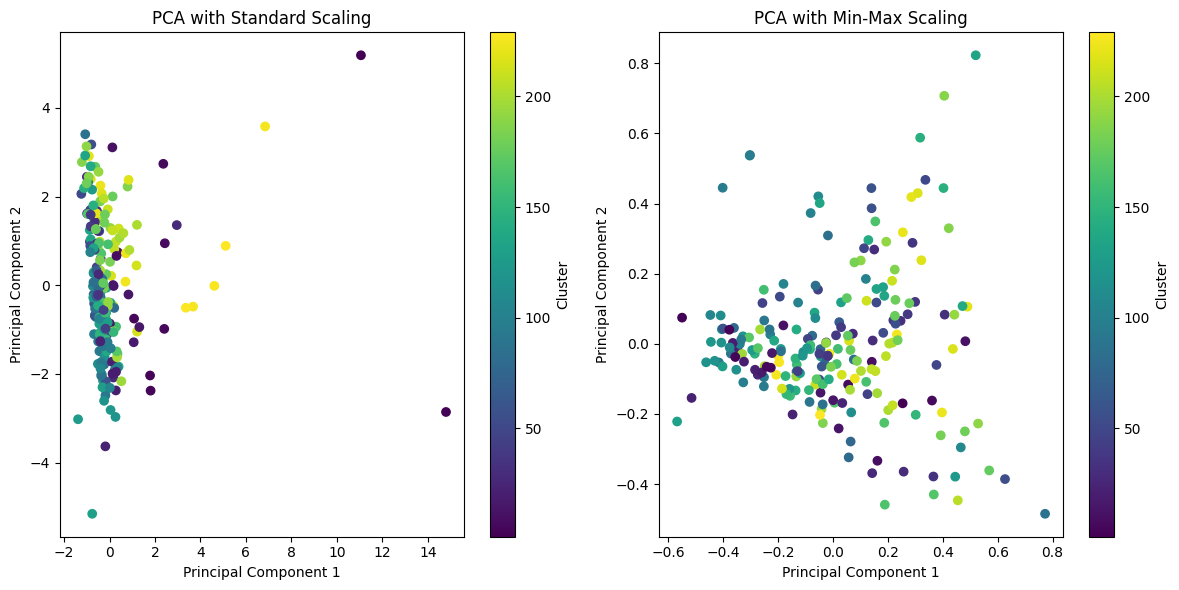

In [85]:
#5a)Apply PCA on the scaled data with 2 components. [2 Marks]

# Select numeric columns for PCA
numeric_columns_standard = df_standard_scaled.select_dtypes(include='number')
numeric_columns_minmax = df_minmax_scaled.select_dtypes(include='number')

# Create a PCA instance with 2 components
pca = PCA(n_components=2)

# Fit and transform the scaled data using PCA
principal_components_standard = pca.fit_transform(numeric_columns_standard)
principal_components_minmax = pca.fit_transform(numeric_columns_minmax)

# Create DataFrames with principal components and cluster labels
df_pca_standard = pd.DataFrame(data=principal_components_standard, columns=['PC1', 'PC2'])
df_pca_minmax = pd.DataFrame(data=principal_components_minmax, columns=['PC1', 'PC2'])

# Visualize the PCA results with a colorbar
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
scatter_standard = plt.scatter(df_pca_standard['PC1'], df_pca_standard['PC2'], c=optimal_clusters, cmap='viridis')
plt.title('PCA with Standard Scaling')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter_standard, label='Cluster')

plt.subplot(1, 2, 2)
scatter_minmax = plt.scatter(df_pca_minmax['PC1'], df_pca_minmax['PC2'], c=optimal_clusters, cmap='viridis')
plt.title('PCA with Min-Max Scaling')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter_minmax, label='Cluster')

plt.tight_layout()
plt.show()


In [88]:
#5b)How much Cumulative Variance is Explained by 2 PCA’s? [1 Marks]


# Select numeric columns for PCA
numeric_columns_standard = df_standard_scaled.select_dtypes(include='number')

# Create a PCA instance with 2 components
pca = PCA(n_components=2)

# Fit and transform the scaled data using PCA
principal_components_standard = pca.fit_transform(numeric_columns_standard)

# Calculate the cumulative variance explained
cumulative_variance_explained = sum(pca.explained_variance_ratio_)

# Print the cumulative variance explained
print("Cumulative Variance Explained by 2 PCA components:", cumulative_variance_explained)



Cumulative Variance Explained by 2 PCA components: 0.39829958243002767


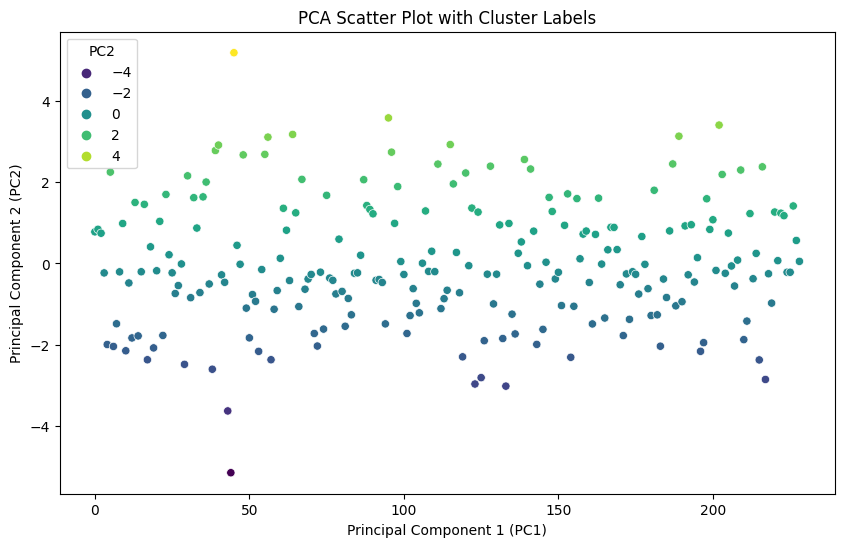

In [100]:
#5c)Plot a scatter plot on PCA’s formed i.e. PCA 1 and PCA 2 with hue as cluster profiles from

# Assuming df_pca_standard is your DataFrame with PCA components and cluster labels

# Scatter plot with hue as cluster labels using 'PC1' and 'PC2' as x and y
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca_standard.index, y='PC2',hue = "PC2" , data=df_pca_standard, palette='viridis')
plt.title('PCA Scatter Plot with Cluster Labels')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()

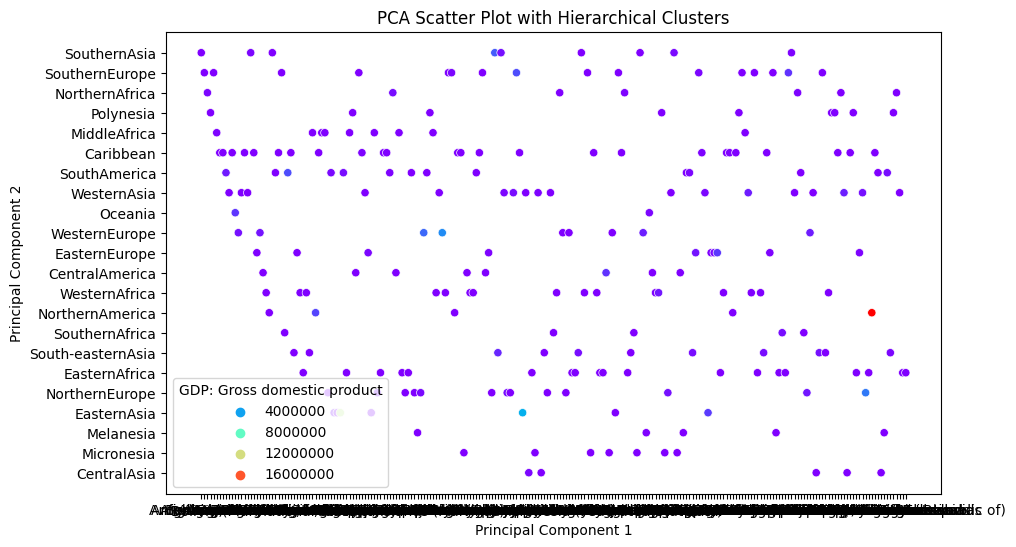

In [111]:
#5d)Mention which are the major clusters. [2 Marks]

import seaborn as sns


# Scatter plot with hue as hierarchical cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='country', y='Region', hue='GDP: Gross domestic product', data=df, palette='rainbow')
plt.title('PCA Scatter Plot with Hierarchical Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


#The x y and the hue can be changes to whatever we want..... :)